In [33]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [34]:
quandl.ApiConfig.api_key = 'VqoMFpJzynp1iaRiepaA'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


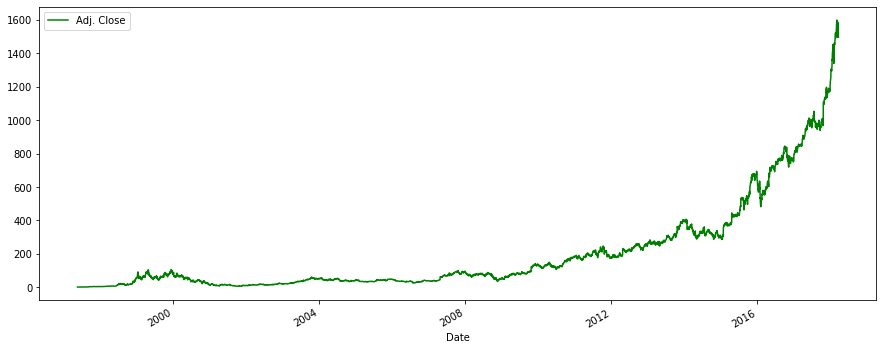

In [35]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show() 

In [36]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

x = np.array(df.drop(['Prediction'], 1))
x = preprocessing.scale(x)
x_forecast = x[-forecast:]
x = x[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LinearRegression()
clf.fit(x_train, y_train)

confidence = clf.score(x_test, y_test)

forecast_predicted = clf.predict(x_forecast)
forecast_predicted

array([1499.94116803, 1538.77198894, 1550.15343645, 1536.26403225,
       1557.15658669, 1572.64003116, 1574.59538722, 1590.79083634,
       1614.11695892, 1603.52190461, 1604.02137056, 1583.83019384,
       1591.05650972, 1615.88103015, 1630.79062012, 1638.61204437,
       1645.90212186, 1674.62672748, 1695.34925095, 1684.4991502 ,
       1687.4959459 , 1678.27176622, 1666.96470726, 1638.53765582,
       1682.72445204, 1677.78292721, 1637.65562021, 1586.07247715,
       1650.1528959 , 1587.65589048])

(17282.0, 18029.5)

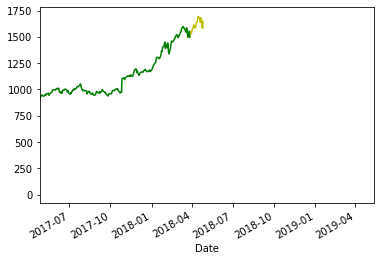

In [38]:
dates = pd.date_range(start='2018-03-28', end='2018-04-26')

plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')

plt.xlim(xmin=datetime.date(2017,4,26))